In [1]:
import os
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
train_dir = 'train'
test_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(240,240), batch_size=32, class_mode='categorical', subset='training')
test_data=train_datagen.flow_from_directory(train_dir, target_size=(240,240), batch_size=32, class_mode='categorical')


Found 570 images belonging to 3 classes.
Found 711 images belonging to 3 classes.


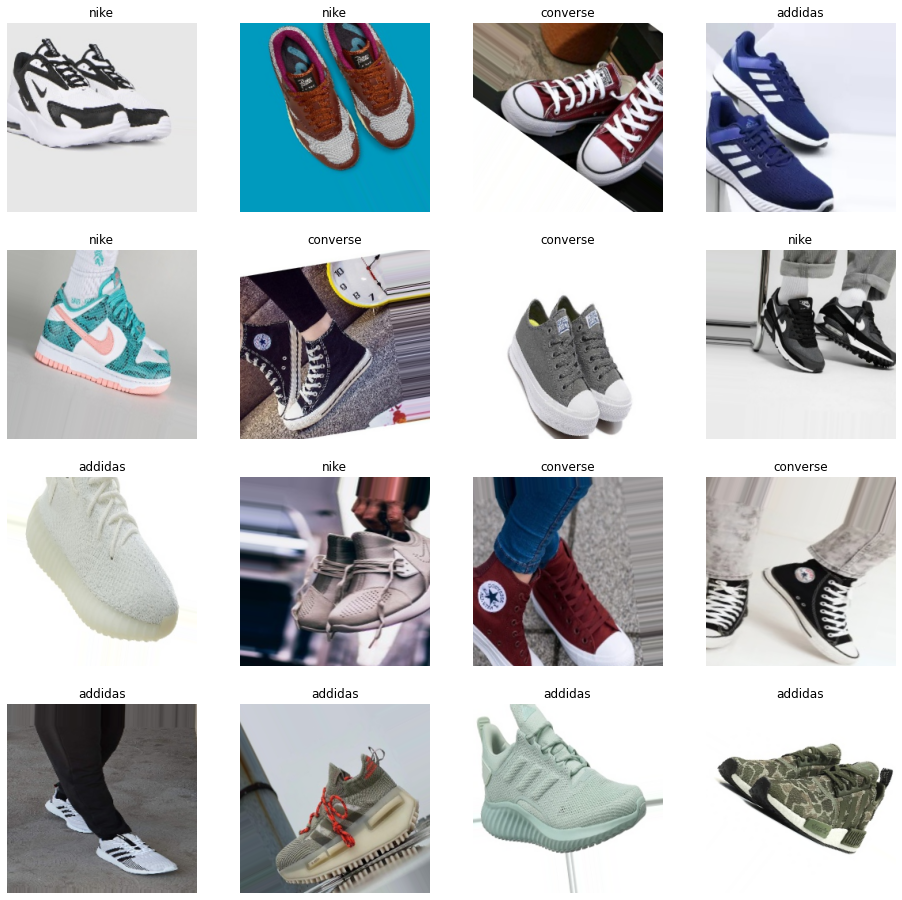

In [5]:
dict = {0:'addidas', 1:'converse', 2:'nike'}
t_x, t_y = next(train_data)
fig, ax = plt.subplots(4,4, figsize=(16,16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, ax.flatten()):
    c_ax.imshow(c_x)
    c_ax.set_title(dict[np.argmax(c_y)])
    c_ax.axis('off')


Creating our Own model

In [6]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (240,240, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(3, activation = 'softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
18/18 [==============================] - 11s 630ms/step - loss: 0.9212 - accuracy: 0.5825 - val_loss: 0.9410 - val_accuracy: 0.5688
Epoch 2/100
18/18 [==============================] - 11s 614ms/step - loss: 0.9123 - accuracy: 0.5737 - val_loss: 0.9383 - val_accuracy: 0.5375
Epoch 3/100
18/18 [==============================] - 11s 600ms/step - loss: 0.9078 - accuracy: 0.5982 - val_loss: 0.9321 - val_accuracy: 0.5500
Epoch 4/100
18/18 [==============================] - 11s 620ms/step - loss: 0.9032 - accuracy: 0.5807 - val_loss: 1.0036 - val_accuracy: 0.5312
Epoch 5/100
18/18 [==============================] - 11s 605ms/step - loss: 0.9245 - accuracy: 0.5596 - val_loss: 0.9095 - val_accuracy: 0.5437
Epoch 6/100
18/18 [==============================] - 11s 610ms/step - loss: 0.8975 - accuracy: 0.5719 - val_loss: 0.9012 - val_accuracy: 0.6500
Epoch 7/100
18/18 [==============================] - 11s 620ms/step - loss: 0.9355 - accuracy: 0.5579 - val_loss: 0.9205 - val_accuracy:

<AxesSubplot:>

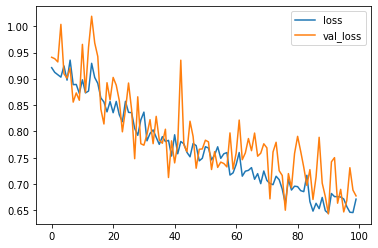

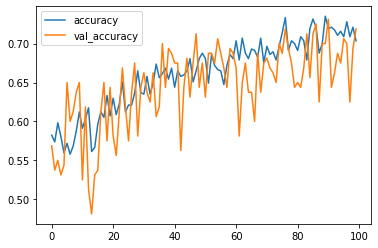

In [21]:
history=model.fit(train_data, epochs = 100, steps_per_epoch = len(train_data), 
                    validation_data = test_data, validation_steps = int(0.25 * len(test_data)))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()      

Transfer Learning using VGG16

Epoch 1/50
18/18 [==============================] - 21s 922ms/step - loss: 1.1457 - accuracy: 0.3649 - val_loss: 1.1050 - val_accuracy: 0.3375
Epoch 2/50
18/18 [==============================] - 12s 638ms/step - loss: 1.1014 - accuracy: 0.3860 - val_loss: 1.0700 - val_accuracy: 0.4938
Epoch 3/50
18/18 [==============================] - 12s 662ms/step - loss: 1.0841 - accuracy: 0.3842 - val_loss: 1.0455 - val_accuracy: 0.5813
Epoch 4/50
18/18 [==============================] - 13s 690ms/step - loss: 1.0547 - accuracy: 0.4491 - val_loss: 1.0390 - val_accuracy: 0.5688
Epoch 5/50
18/18 [==============================] - 12s 671ms/step - loss: 1.0311 - accuracy: 0.4754 - val_loss: 1.0137 - val_accuracy: 0.6125
Epoch 6/50
18/18 [==============================] - 11s 623ms/step - loss: 1.0228 - accuracy: 0.4947 - val_loss: 0.9978 - val_accuracy: 0.6500
Epoch 7/50
18/18 [==============================] - 12s 661ms/step - loss: 1.0113 - accuracy: 0.5281 - val_loss: 0.9840 - val_accuracy: 0.6562

<AxesSubplot:>

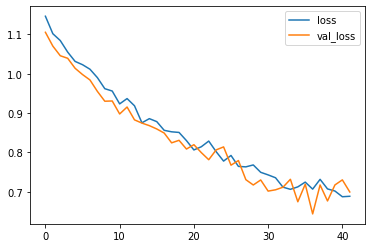

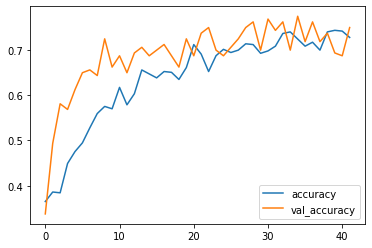

In [10]:

from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))
conv_base.trainable = False
inputs=tf.keras.layers.Input(shape=(240,240,3), name='inputLayer')
x=conv_base(inputs, training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)  
x=tf.keras.layers.Dense(512, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(3, activation='softmax')(x)
model2=tf.keras.Model(inputs, outputs)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model2.fit(train_data, epochs = 50, steps_per_epoch = len(train_data),validation_data = test_data, validation_steps = int(0.25 * len(test_data)), callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()


Transfer Learning using MobileNetV2

Epoch 1/50
18/18 [==============================] - 16s 687ms/step - loss: 1.0465 - accuracy: 0.5421 - val_loss: 0.7110 - val_accuracy: 0.6938
Epoch 2/50
18/18 [==============================] - 11s 615ms/step - loss: 0.6630 - accuracy: 0.7158 - val_loss: 0.6185 - val_accuracy: 0.7063
Epoch 3/50
18/18 [==============================] - 11s 616ms/step - loss: 0.4921 - accuracy: 0.7860 - val_loss: 0.4443 - val_accuracy: 0.8250
Epoch 4/50
18/18 [==============================] - 11s 597ms/step - loss: 0.4170 - accuracy: 0.8298 - val_loss: 0.4063 - val_accuracy: 0.8625
Epoch 5/50
18/18 [==============================] - 16s 892ms/step - loss: 0.3986 - accuracy: 0.8526 - val_loss: 0.4682 - val_accuracy: 0.8000
Epoch 6/50
18/18 [==============================] - 12s 634ms/step - loss: 0.4057 - accuracy: 0.8509 - val_loss: 0.3646 - val_accuracy: 0.8500
Epoch 7/50
18/18 [==============================] - 11s 622ms/step - loss: 0.3444 - accuracy: 0.8649 - val_loss: 0.2611 - val_accuracy: 0.9062

<AxesSubplot:>

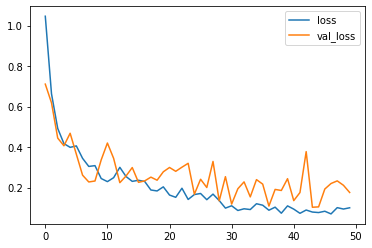

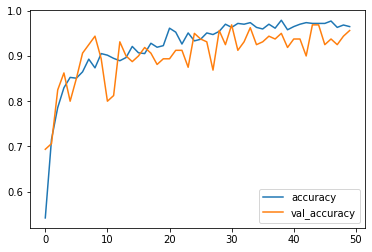

In [13]:
conv_base = tf.keras.applications.MobileNetV2( include_top=False, weights='imagenet')
conv_base.trainable = False
inputs=tf.keras.layers.Input(shape=(240,240,3), name='inputLayer')
x=conv_base(inputs, training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(3, activation='softmax')(x)
model3=tf.keras.Model(inputs, outputs)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(train_data, epochs = 50, steps_per_epoch = len(train_data),validation_data = test_data, validation_steps = int(0.25 * len(test_data)), callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

Fine tuning the model

In [14]:
conv_base = tf.keras.applications.MobileNetV2(input_shape=(240, 240, 3), include_top=False, weights='imagenet')
conv_base.trainable = True
fine_tune_at = 15
for layer in conv_base.layers[:fine_tune_at]:
    layer.trainable =  False
inputs=tf.keras.layers.Input(shape=(240,240,3), name='inputLayer')
x=conv_base(inputs, training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(3, activation='softmax')(x)
model4=tf.keras.Model(inputs, outputs)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True,min_delta=0.001)
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model4.fit(train_data, epochs = 50, steps_per_epoch = len(train_data),validation_data = test_data, validation_steps = int(0.25 * len(test_data)), callbacks=[early_stopping])

Epoch 1/50
18/18 [==============================] - 20s 778ms/step - loss: 1.1052 - accuracy: 0.4175 - val_loss: 0.9863 - val_accuracy: 0.4812
Epoch 2/50
18/18 [==============================] - 11s 612ms/step - loss: 0.8940 - accuracy: 0.5719 - val_loss: 0.9892 - val_accuracy: 0.4625
Epoch 3/50
18/18 [==============================] - 11s 593ms/step - loss: 0.7494 - accuracy: 0.6316 - val_loss: 0.6873 - val_accuracy: 0.7250
Epoch 4/50
18/18 [==============================] - 11s 593ms/step - loss: 0.6036 - accuracy: 0.7526 - val_loss: 0.5235 - val_accuracy: 0.7937
Epoch 5/50
18/18 [==============================] - 11s 593ms/step - loss: 0.4854 - accuracy: 0.7842 - val_loss: 0.6536 - val_accuracy: 0.7125
Epoch 6/50
18/18 [==============================] - 11s 593ms/step - loss: 0.4020 - accuracy: 0.8281 - val_loss: 0.3448 - val_accuracy: 0.8500
Epoch 7/50
18/18 [==============================] - 11s 595ms/step - loss: 0.3135 - accuracy: 0.8772 - val_loss: 0.4786 - val_accuracy: 0.8062

<AxesSubplot:>

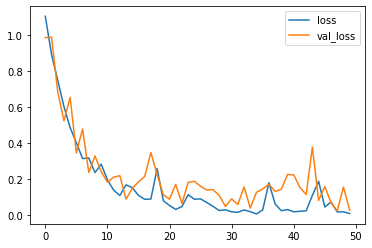

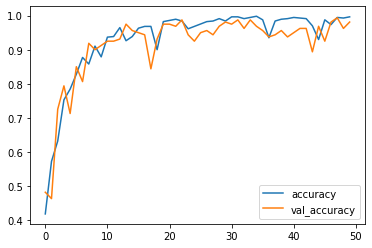

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

Testing all models for accuracy

In [22]:
model.evaluate(test_data)

23/23 [==============================] - 12s 499ms/step - loss: 0.7408 - accuracy: 0.6624


[0.7407887578010559, 0.6624472737312317]

In [17]:
model2.evaluate(test_data)

23/23 [==============================] - 12s 514ms/step - loss: 0.6916 - accuracy: 0.7440


[0.6916050910949707, 0.7440224885940552]

In [18]:
model3.evaluate(test_data)

23/23 [==============================] - 11s 455ms/step - loss: 0.1846 - accuracy: 0.9395


[0.18464761972427368, 0.9395217895507812]

In [19]:
model4.evaluate(test_data)

23/23 [==============================] - 11s 463ms/step - loss: 0.0834 - accuracy: 0.9775


[0.08344369381666183, 0.9774965047836304]

In [20]:
#model 4 is the best model
def predict(img_rel_path):
    img = image.load_img(img_rel_path, target_size=(240, 240))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()
    p = model4.predict(img[np.newaxis, ...])
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}
    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")
    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")
    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))      
    def plot_bar_x():
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

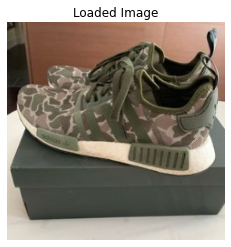

1/1 [==============================] - 0s 56ms/step


Maximum Probability:  0.9999993
Classified: adidas 



-------------------Individual Probability--------------------------------

ADIDAS : 100.0 %
CONVERSE : 0.0 %
NIKE : 0.0 %


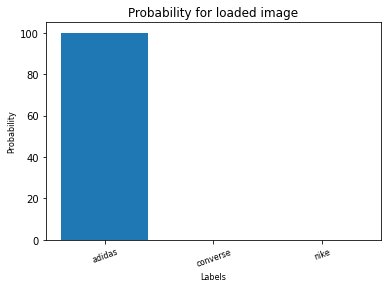

In [24]:
predict('test/adidas/3.jpg')

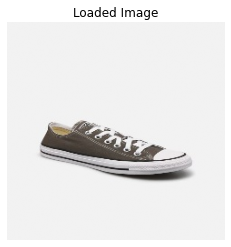

1/1 [==============================] - 0s 64ms/step


Maximum Probability:  0.9998573
Classified: converse 



-------------------Individual Probability--------------------------------

ADIDAS : 0.01 %
CONVERSE : 99.99 %
NIKE : 0.0 %


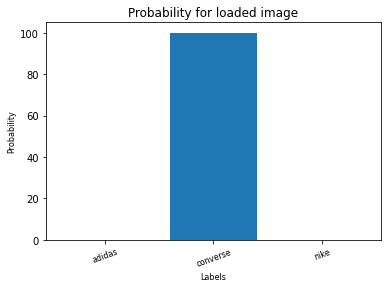

In [25]:
predict('test/converse/5.jpg')

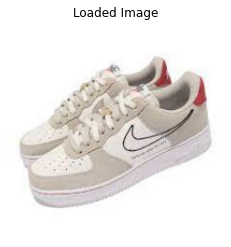

1/1 [==============================] - 0s 48ms/step


Maximum Probability:  0.9957073
Classified: nike 



-------------------Individual Probability--------------------------------

ADIDAS : 0.02 %
CONVERSE : 0.4 %
NIKE : 99.57 %


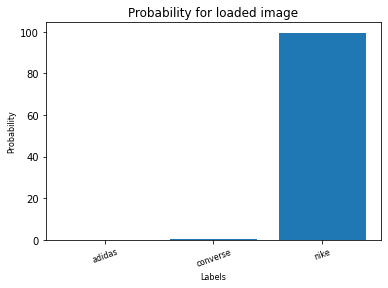

In [26]:
predict('test/nike/1.jpg')

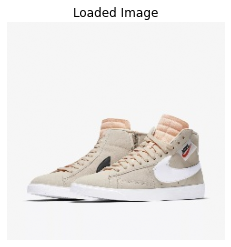

1/1 [==============================] - 0s 56ms/step


Maximum Probability:  0.99983644
Classified: nike 



-------------------Individual Probability--------------------------------

ADIDAS : 0.0 %
CONVERSE : 0.01 %
NIKE : 99.98 %


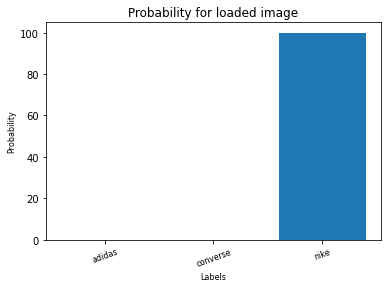

In [27]:
predict('test/nike/32.jpg')